<a href="https://colab.research.google.com/github/dkuzzmin/DI-Bootcamp/blob/main/Week6/Day2/W6D2_XC_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# df = pd.read_csv('global_power_plant_database.csv', encoding='latin1')
df = pd.read_csv('global_power_plant_database-2.csv', encoding ='latin1', sep=',', error_bad_lines=False)


<ipython-input-6-25335d8b26d3>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('global_power_plant_database-2.csv', encoding ='latin1', sep=',', error_bad_lines=False)
Skipping line 17935: expected 36 fields, saw 47

Skipping line 38086: expected 36 fields, saw 38
Skipping line 40688: expected 36 fields, saw 37
Skipping line 46311: expected 36 fields, saw 58

<ipython-input-6-25335d8b26d3>:2: DtypeWarning: Columns (4,10,20,21,22,23,24,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database-2.csv', encoding ='latin1', sep=',', error_bad_lines=False)


# 1. Data Import and Cleaning:



In [7]:
df.sample(30)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
41624,THA,Thailand,The Mall - Ngamwongwan Solar Power Plant,WRI1026328,1.0,13.8551,100.5417,Solar,NaN,NaN,...,1.76,1.66,2.02,1.72,1.75,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
35214,NER,Niger,Soraz,WRI1023144,54.0,14.1888,8.7859,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,100.60,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
18431,IND,India,Gundlupet,WKS0067038,20.0,11.8050,76.6700,Solar,NaN,NaN,...,43.19,42.14,45.55,45.86,42.87,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
37726,ESP,Spain,El Bailadero,WKS0065992,9.0,28.1770,-16.4450,Solar,NaN,NaN,...,20.82,20.97,20.89,21.06,20.82,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
7627,CHN,China,Ningxia Duodian Dawukou Phase I,WRI1029336,10.0,38.9900,106.4700,Solar,NaN,NaN,...,15.88,16.32,16.13,16.51,16.34,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
50913,USA,United States of America,Oakley Solar Project,USA0058376,1.5,38.0017,-121.7478,Solar,NaN,NaN,...,NaN,3.03,3.36,2.94,3.1,NO-ESTIMATION,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1
18564,IND,India,KHODRI,IND0000197,120.0,30.5085,77.8001,Hydro,NaN,NaN,...,507.33,403.48,406.08,360.36,433.66,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
5396,CHN,China,Chengzigou Plant,WRI1071885,115.0,33.1144,104.9364,Hydro,NaN,NaN,...,282.04,344.77,348.24,409.28,283.24,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
49528,USA,United States of America,Laredo Bus Facility Solar Canopies,USA0058064,1.0,33.7833,-84.2678,Solar,NaN,NaN,...,1.66,1.86,1.92,1.79,1.67,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1
38084,GBR,United Kingdom,Paddock Wood,GBR0002266,9.2,51.1726,0.4120,Solar,NaN,NaN,...,13.71,14.45,13.98,13.96,14.33,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE


In [8]:
# df[df['country_long'] == 'Russia'].head(50)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54928 entries, 0 to 54927
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         54928 non-null  object 
 1   country_long                    54928 non-null  object 
 2   name                            54928 non-null  object 
 3   gppd_idnr                       54928 non-null  object 
 4   capacity_mw                     54928 non-null  object 
 5   latitude                        54927 non-null  float64
 6   longitude                       54927 non-null  float64
 7   primary_fuel                    54927 non-null  object 
 8   other_fuel1                     2644 non-null   object 
 9   other_fuel2                     322 non-null    object 
 10  other_fuel3                     103 non-null    object 
 11  commissioning_year              23978 non-null  float64
 12  owner                           

In [9]:
df[df['latitude'].isna()]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
14052,IND,India,ACME Solar Tower,WRI1020://cdm.unfccc.int/Projects/redirector?r...,UNFCCC CDM Registry,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df['capacity_mw'].describe()

count     54928.0
unique     7893.0
top           5.0
freq       1776.0
Name: capacity_mw, dtype: float64

In [11]:
df[df['capacity_mw'] =='UNFCCC CDM Registry']

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
14052,IND,India,ACME Solar Tower,WRI1020://cdm.unfccc.int/Projects/redirector?r...,UNFCCC CDM Registry,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df=df.drop(index=14052)

In [13]:
df[df['capacity_mw'] =='UNFCCC CDM Registry']


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54927 entries, 0 to 54927
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         54927 non-null  object 
 1   country_long                    54927 non-null  object 
 2   name                            54927 non-null  object 
 3   gppd_idnr                       54927 non-null  object 
 4   capacity_mw                     54927 non-null  object 
 5   latitude                        54927 non-null  float64
 6   longitude                       54927 non-null  float64
 7   primary_fuel                    54927 non-null  object 
 8   other_fuel1                     2644 non-null   object 
 9   other_fuel2                     322 non-null    object 
 10  other_fuel3                     103 non-null    object 
 11  commissioning_year              23978 non-null  float64
 12  owner                           

In [15]:
rdf = df['commissioning_year']

rdf.head(50)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9     1965.0
10    1978.0
11    1985.0
12    1951.0
13    1963.0
14    1958.0
15    1971.0
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25    2010.0
26       NaN
27    2010.0
28       NaN
29    1980.0
30    2016.0
31    2016.0
32       NaN
33       NaN
34       NaN
35       NaN
36    2009.0
37       NaN
38    2013.0
39    2015.0
40    1988.0
41       NaN
42       NaN
43       NaN
44       NaN
45    1952.0
46       NaN
47       NaN
48       NaN
49    2013.0
Name: commissioning_year, dtype: float64

In [16]:
df['commissioning_year'].unique()

array([          nan, 1965.        , 1978.        , ..., 1972.04932735,
       2001.6102045 , 2013.7755102 ])

In [17]:

df['commissioning_year'].replace(np.nan, 1800, inplace=True)
df['commissioning_year'] = pd.to_datetime(df['commissioning_year'], format='%Y').dt.date

df['commissioning_year']

0        1800-01-01
1        1800-01-01
2        1800-01-01
3        1800-01-01
4        1800-01-01
            ...    
54923    1800-01-01
54924    1800-01-01
54925    1800-01-01
54926    1800-01-01
54927    1800-01-01
Name: commissioning_year, Length: 54927, dtype: object

In [18]:
df['year_of_capacity_data'].unique()

array([2017.   ,      nan, 2015.   , 2013.   , 2016.   , 2014.   ,
       2000.   , 2012.   , 2009.   , 2010.   , 2019.   ,    2.932,
       2018.   ])

In [19]:
df[df['year_of_capacity_data'] == 2.932][['name','commissioning_year', 'year_of_capacity_data']]

,name,commissioning_year,year_of_capacity_data
43863,Packington Generation Plant Phase 3,1800-01-01,2.932


In [20]:
df=df.drop(index=43863)

In [21]:
df[df['year_of_capacity_data'] == 2.932][['name','commissioning_year', 'year_of_capacity_data']]

,name,commissioning_year,year_of_capacity_data


In [22]:
df['year_of_capacity_data'].replace(np.nan, 1800, inplace=True)
df['year_of_capacity_data'] = pd.to_datetime(df['year_of_capacity_data'], format='%Y').dt.date

df['year_of_capacity_data']

0        2017-01-01
1        1800-01-01
2        1800-01-01
3        2017-01-01
4        2017-01-01
            ...    
54923    1800-01-01
54924    1800-01-01
54925    1800-01-01
54926    2017-01-01
54927    2017-01-01
Name: year_of_capacity_data, Length: 54926, dtype: object

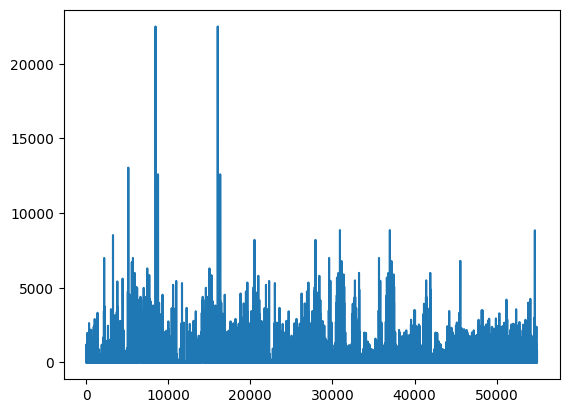

In [23]:
df['capacity_mw'] = df['capacity_mw'].astype(float)


array = np.array(df['capacity_mw'])
array
plt.plot(array)


In [24]:
ndf = df[['country', 'name', 'capacity_mw', 'primary_fuel', 'latitude','longitude']]
ndf

,country,name,capacity_mw,primary_fuel,latitude,longitude
0,AFG,Kajaki Hydroelectric Power Plant Afghanistan,33.0,Hydro,32.3220,65.1190
1,AFG,Kandahar DOG,10.0,Solar,31.6700,65.7950
2,AFG,Kandahar JOL,10.0,Solar,31.6230,65.7920
3,AFG,Mahipar Hydroelectric Power Plant Afghanistan,66.0,Hydro,34.5560,69.4787
4,AFG,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,Hydro,34.6410,69.7170
...,...,...,...,...,...,...
54923,ZMB,Ndola,50.0,Oil,-12.9667,28.6333
54924,ZMB,Nkana,20.0,Oil,-12.8167,28.2000
54925,ZMB,Victoria Falls,108.0,Hydro,-17.9167,25.8500
54926,ZWE,Hwange Coal Power Plant Zimbabwe,920.0,Coal,-18.3835,26.4700


In [25]:
df[df['estimated_generation_gwh_2017'] == 'NO-ESTIMATION']

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
21672,NZL,New Zealand,Wairakei,WRI1000331,132.0,-38.6266,176.1055,Geothermal,NaN,NaN,...,NaN,NaN,NaN,21.94,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,NaN
35185,GBR,United Kingdom,Packington Generation Plant Phase 3,GBR0000559,8.5,52.4697,-1.6908,Waste,NaN,NaN,...,NaN,NaN,NaN,985.76,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,NaN


In [26]:
df.loc[21672, 'estimated_generation_gwh_2017'] = 0
df.loc[35185, 'estimated_generation_gwh_2017'] = 0

In [27]:
df.loc[21672]['estimated_generation_gwh_2017']

0

In [28]:
df['estimated_generation_gwh_2017'] = df['estimated_generation_gwh_2017'].astype(float)


In [29]:
df[df['estimated_generation_gwh_2017'].isna()]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
6,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.000,34.5638,69.1134,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
16,ALB,Albania,Vlora,WRI1002176,98.000,40.4874,19.4340,Other,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
90,ATA,Antarctica,McMurdo Station Generator,WRI1023843,6.600,-77.8470,166.6605,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
91,ATA,Antarctica,Ross Island,WRI1022458,1.000,-77.8428,166.7271,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
376,AUS,Australia,Broadwater,AUS0000268,38.000,-29.0118,153.4335,Biomass,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54607,URY,Uruguay,ZENDALEATHER,URY0000837,3.720,-34.8467,-56.2347,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
54753,VNM,Vietnam,Gia Lai sugar-cane,WRI1030753,12.000,13.4257,108.4200,Biomass,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
54786,VNM,Vietnam,Lap Vo Rice Husk Power Plant,WRI1030735,10.000,10.3492,105.5700,Biomass,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
54903,ESH,Western Sahara,Dakhla IC Power Plant Western Sahara,GEODB0042583,23.400,23.6816,-15.9594,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION


In [30]:
ttdf = df.copy()

ttdf['estimated_generation_gwh_2017'] = ttdf['estimated_generation_gwh_2017'].fillna(value=0)
ttdf

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.7,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.1,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.9,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54923,ZMB,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,183.79,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
54924,ZMB,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,73.51,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
54925,ZMB,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,Hydro,NaN,NaN,...,575.78,575.78,548.94,579.9,578.32,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
54926,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,2785.10,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [31]:
df[df['estimated_generation_gwh_2017'].isna()]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
6,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.000,34.5638,69.1134,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
16,ALB,Albania,Vlora,WRI1002176,98.000,40.4874,19.4340,Other,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
90,ATA,Antarctica,McMurdo Station Generator,WRI1023843,6.600,-77.8470,166.6605,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
91,ATA,Antarctica,Ross Island,WRI1022458,1.000,-77.8428,166.7271,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
376,AUS,Australia,Broadwater,AUS0000268,38.000,-29.0118,153.4335,Biomass,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54607,URY,Uruguay,ZENDALEATHER,URY0000837,3.720,-34.8467,-56.2347,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
54753,VNM,Vietnam,Gia Lai sugar-cane,WRI1030753,12.000,13.4257,108.4200,Biomass,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
54786,VNM,Vietnam,Lap Vo Rice Husk Power Plant,WRI1030735,10.000,10.3492,105.5700,Biomass,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
54903,ESH,Western Sahara,Dakhla IC Power Plant Western Sahara,GEODB0042583,23.400,23.6816,-15.9594,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION


# 2. Exploratory Data Analysis:

In [32]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2017
count,54926.000000,54926.000000,54926.000000,7479.000000,8794.000000,27023.000000,27512.000000,52211.000000
mean,169.220212,35.090596,4.870066,584.984811,727.517076,224.070818,225.716960,745.301077
std,505.485659,20.645050,74.948613,2160.807861,2361.632892,1114.461585,1194.195572,2576.329550
min,1.000000,-77.847000,-179.977700,-947.600000,-989.619000,1.120000,0.870000,0.000000
25%,5.000000,30.432250,-70.530375,1.925000,2.406000,8.240000,8.300000,8.940000
50%,17.160000,40.553900,2.323500,23.054000,26.450000,25.180000,25.570000,38.290000
75%,78.000000,48.473125,73.388600,196.754912,268.945792,100.175000,100.830000,234.030000
max,22500.000000,71.292000,179.388700,50834.000000,32320.917000,48675.060000,58470.770000,82810.770000


In [33]:
gkk = df.groupby(['country'])['capacity_mw'].count()
gkk.head(20)

country
AFG      9
AGO     14
ALB      8
ARE     60
ARG    236
ARM      8
ATA      2
AUS    486
AUT    103
AZE     14
BDI      4
BEL     69
BEN      2
BFA      7
BGD     57
BGR     43
BHR      8
BIH     20
BLR     24
BOL     26
Name: capacity_mw, dtype: int64

In [34]:
gtt=gkk.sort_values(ascending=False)
gtt.head(20)

country
USA    11594
CHN     7067
GBR     5501
FRA     4309
IND     3177
DEU     2618
BRA     2360
ESP     1657
CAN     1159
RUS     1090
JPN     1044
PRT      938
CZE      924
ITA      792
NOR      612
MEX      554
AUS      486
THA      392
POL      378
FIN      370
Name: capacity_mw, dtype: int64

In [42]:
gkk1 = df.groupby(['primary_fuel'])['capacity_mw'].sum()
gkk1

primary_fuel
Biomass           4.671585e+04
Coal              3.295140e+06
Cogeneration      7.170800e+03
Gas               2.351952e+06
Geothermal        2.188960e+04
Hydro             1.682386e+06
Nuclear           6.895326e+05
Oil               4.676626e+05
Other             5.080260e+03
Petcoke           4.179078e+03
Solar             3.103155e+05
Storage           2.845600e+03
Waste             2.042231e+04
Wave and Tidal    1.084400e+03
Wind              3.882134e+05
Name: capacity_mw, dtype: float64

In [43]:
gtt2=gkk1.sort_values(ascending=False)
gtt2.head(20)

primary_fuel
Coal              3.295140e+06
Gas               2.351952e+06
Hydro             1.682386e+06
Nuclear           6.895326e+05
Oil               4.676626e+05
Wind              3.882134e+05
Solar             3.103155e+05
Biomass           4.671585e+04
Geothermal        2.188960e+04
Waste             2.042231e+04
Cogeneration      7.170800e+03
Other             5.080260e+03
Petcoke           4.179078e+03
Storage           2.845600e+03
Wave and Tidal    1.084400e+03
Name: capacity_mw, dtype: float64

# 3. Statistical Analysis:

In [37]:
mean = df.groupby('primary_fuel')['capacity_mw'].mean()
print("Mean Capacity:")
print(mean)

Mean Capacity:
primary_fuel
Biomass             22.098321
Coal               829.800944
Cogeneration       137.900000
Gas                399.584066
Geothermal          67.980124
Hydro              153.348458
Nuclear           2168.341572
Oil                157.780894
Other               76.973636
Petcoke            298.505536
Solar               17.448161
Storage             14.668041
Waste               12.661071
Wave and Tidal      57.073684
Wind                44.947715
Name: capacity_mw, dtype: float64


In [38]:
med = df.groupby('primary_fuel')['capacity_mw'].median()
print("Median Capacity:")
print(med)

Median Capacity:
primary_fuel
Biomass              8.90000
Coal               600.00000
Cogeneration        34.50000
Gas                164.77500
Geothermal          31.00000
Hydro               23.70000
Nuclear           1902.00000
Oil                 13.85000
Other               40.00000
Petcoke             65.48875
Solar                6.07880
Storage              5.00000
Waste                4.27800
Wave and Tidal       4.00000
Wind                24.00000
Name: capacity_mw, dtype: float64


In [39]:
st_dev = df.groupby('primary_fuel')['capacity_mw'].std()
print("Standard Deviation of Capacity:")
print(st_dev)

Standard Deviation of Capacity:
primary_fuel
Biomass             39.168261
Coal               888.298650
Cogeneration       348.060315
Gas                596.513972
Geothermal         106.789958
Hydro              563.085327
Nuclear           1359.789709
Oil                473.424437
Other              123.069971
Petcoke            598.856706
Solar               41.141743
Storage             41.416528
Waste               19.159631
Wave and Tidal     101.082523
Wind                91.667000
Name: capacity_mw, dtype: float64


In [45]:
fuel_capacity = [df[df['primary_fuel'] == 'Coal']['capacity_mw'],df[df['primary_fuel'] == 'Gas']['capacity_mw'] ]
f_stat, p_value = f_oneway(*fuel_capacity)

print("\nHypothesis Testing Results:")
print(f"F-Statistic: {f_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Means are significantly different.")
else:
    print("Fail to reject null hypothesis: Means are not significantly different.")



Hypothesis Testing Results:
F-Statistic: 827.5249277908132
P-value: 8.172327128628911e-175
Reject null hypothesis: Means are significantly different.


# 4. Time Series Analysis:

In [47]:
result = df.groupby(['commissioning_year', 'primary_fuel'])['capacity_mw'].sum().reset_index()

result

,commissioning_year,primary_fuel,capacity_mw
0,1800-01-01,Biomass,21750.440600
1,1800-01-01,Coal,422908.608600
2,1800-01-01,Cogeneration,6012.000000
3,1800-01-01,Gas,941433.137189
4,1800-01-01,Geothermal,10504.500000
...,...,...,...
723,2020-01-01,Gas,2470.400000
724,2020-01-01,Solar,2219.400000
725,2020-01-01,Storage,12.000000
726,2020-01-01,Waste,116.000000


# 5.Advanced Visualization:

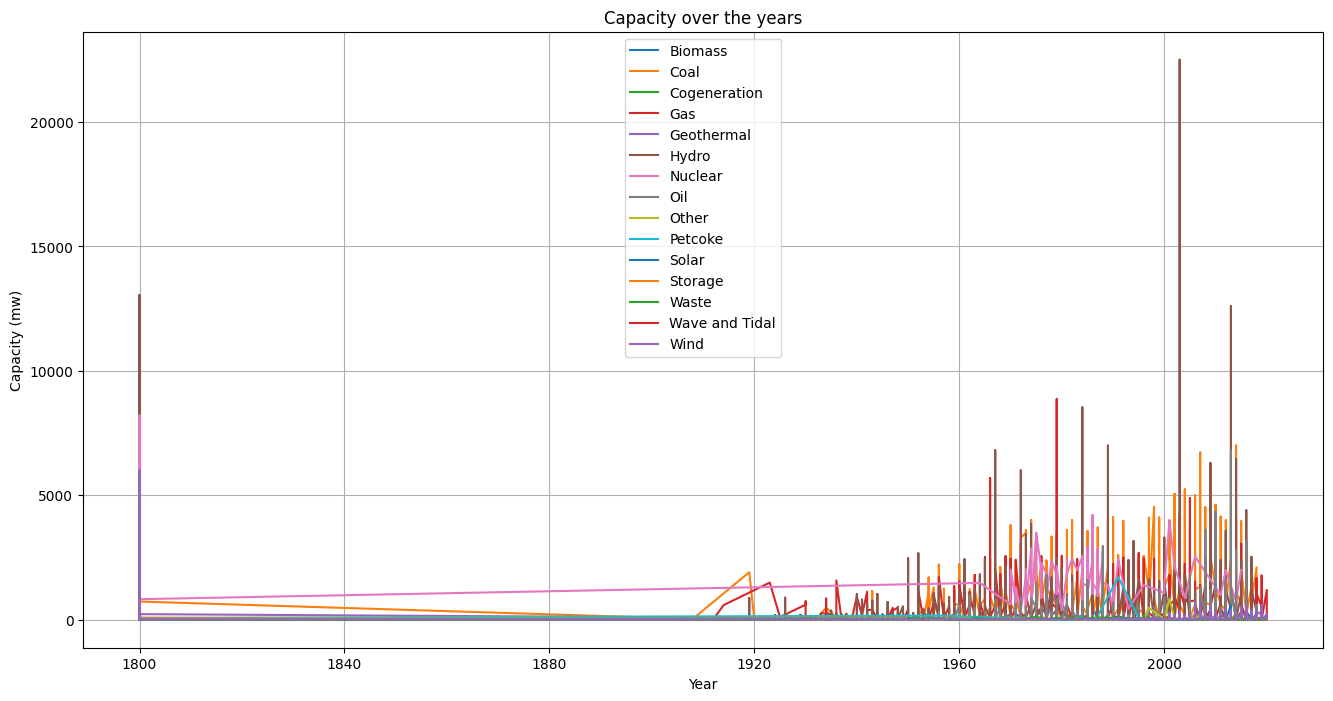

In [51]:
fig, ax = plt.subplots(figsize=(16, 8))

for fuel, sum in df.groupby('primary_fuel'):
    sum.plot(x='commissioning_year', y='capacity_mw', ax=ax, label=fuel)

plt.xlabel('Year')
plt.ylabel('Capacity (mw)')
plt.title('Capacity over the years')
plt.legend()
plt.grid(True)
plt.show()

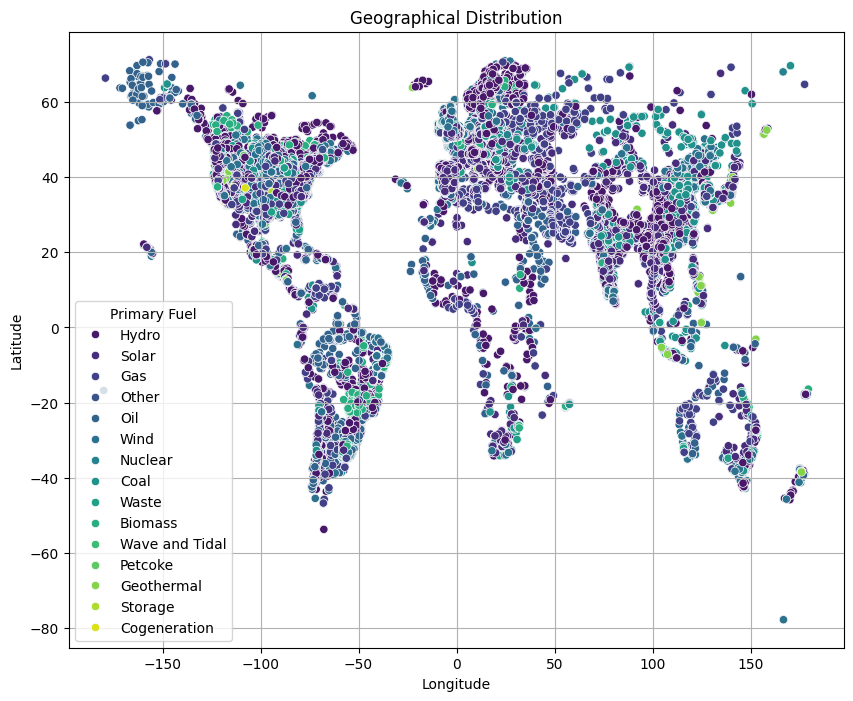

In [55]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='primary_fuel', palette='viridis', legend='full')
plt.title('Geographical Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Primary Fuel', loc='lower left')
plt.grid(True)
plt.show()

# 6. Matrix Operations in Real-World Context:

Calculating the covariance matrix

In [69]:
encoded_fuel = pd.get_dummies(df['primary_fuel'])
encoded_fuel


,Biomass,Coal,Cogeneration,Gas,Geothermal,Hydro,Nuclear,Oil,Other,Petcoke,Solar,Storage,Waste,Wave and Tidal,Wind
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54923,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
54924,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
54925,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
54926,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
feature_matrix = pd.concat([df[['capacity_mw', 'latitude', 'longitude']], encoded_fuel], axis=1).to_numpy()

cov_matrix = np.cov(feature_matrix.T)
print(cov_matrix)

[[ 2.55515751e+05 -3.94995848e+02  5.91567636e+03 -5.66255213e+00
   4.77590549e+01 -2.96522713e-02  2.46867847e+01 -5.93524044e-01
  -3.17030505e+00  1.15743394e+01 -6.17317020e-01 -1.10847045e-01
   3.29539288e-02 -4.91445776e+01 -5.45892053e-01 -4.59772222e+00
  -3.87944291e-02 -1.95419491e+01]
 [-3.94995848e+02  4.26218092e+02 -1.24838422e+02 -3.01000858e-01
  -1.28544150e-01  4.65710708e-03 -1.73293009e-01 -4.00446831e-02
  -4.15503278e-01  2.66301532e-02 -9.62523280e-01  9.44478037e-03
  -8.28472361e-04  1.04700002e+00  2.84949963e-02  2.02136224e-01
   6.34400137e-03  6.97030450e-01]
 [ 5.91567636e+03 -1.24838422e+02  5.61729456e+03 -1.04855984e+00
   4.57396467e+00 -7.28953801e-02 -1.73914325e+00  5.06571553e-03
   3.72698482e-01  7.81061883e-02 -2.11428340e+00 -3.29271130e-02
  -2.45698649e-02  1.77570292e+00 -2.59967808e-01 -1.04554732e+00
   6.93411721e-04 -4.68337410e-01]
 [-5.66255213e+00 -3.01000858e-01 -1.04855984e+00  3.70074839e-02
  -2.78263877e-03 -3.64384830e-05 -4.

In [70]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [71]:
eigenvalues

array([2.55656354e+05, 5.47997856e+03, 4.22967246e+02, 2.59496799e-01,
       1.76451248e-01, 1.14931847e-01, 7.72306714e-02, 5.30632578e-02,
       4.14060455e-02, 3.09670307e-02, 7.12554206e-03, 5.37694587e-03,
       3.75653514e-03, 1.32915591e-03, 1.00147045e-03, 3.73986700e-04,
       2.68652126e-04, 2.77370364e-17])

In [72]:
eigenvectors

array([[-9.99718965e-01,  2.36825563e-02,  1.01835828e-03,
        -1.56463879e-04,  2.10217507e-05,  1.74518624e-04,
         1.37945833e-04, -8.81386943e-05,  6.44788904e-05,
        -2.27151644e-05, -2.84840767e-05, -4.92552537e-05,
         1.31208043e-05, -2.39630420e-06,  5.47063303e-07,
        -4.92184358e-07,  1.39039083e-07,  1.54992385e-17],
       [ 1.55874204e-03,  2.28375232e-02,  9.99729948e-01,
         2.20929834e-03,  1.12195630e-03, -1.58159254e-03,
        -1.50762690e-03, -2.07693491e-03,  1.00837878e-04,
         8.87167257e-04, -3.20542984e-05, -1.31656212e-04,
        -6.56364239e-05,  2.87267083e-05, -2.93733936e-06,
         1.54223753e-05, -6.96521920e-06,  3.22896006e-17],
       [-2.36531400e-02, -9.99458111e-01,  2.28654621e-02,
         4.91103407e-04, -1.70551796e-04, -5.15876479e-04,
         2.49397852e-04, -7.10065513e-04,  2.56384416e-04,
        -1.11531596e-04,  1.02735917e-05,  1.64185115e-05,
         4.32242972e-05, -5.68725020e-06,  1.07145339e

Eigenvalues are the special set of scalar values that is associated with the set of linear equations most probably in the matrix equations. The eigenvectors are also termed as characteristic roots. It is a non-zero vector that can be changed at most by its scalar factor after the application of linear transformations.

# 7. Integrating NumPy with Pandas and Matplotlib:

We use NumPy to create x-axis plots in Matplotlib

In [79]:
x = np.linspace(0,10,101)
x


array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [80]:
x = np.arange(101)
print(x)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


Using NumPy to create boolean array for pandas's dataframe

In [87]:
df = pd.DataFrame({'Column1': [1, 2, 3, 4, 5]})
boolean_array = np.array([True, False, True, False, True])

filtered_df = df[boolean_array]
filtered_df

,Column1
0,1
2,3
4,5


Using numpy for creating sophisticated plots in Matplotlib.





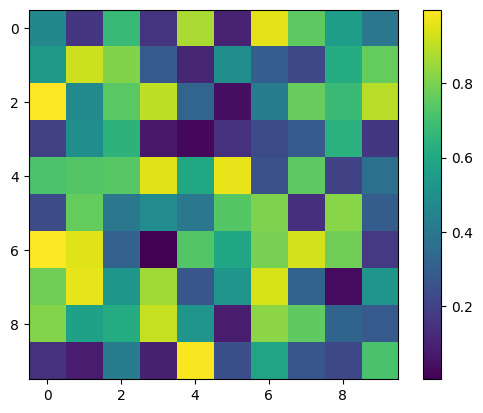

In [82]:
data = np.random.rand(10, 10)

plt.imshow(data, cmap='viridis')
plt.colorbar()

plt.show()

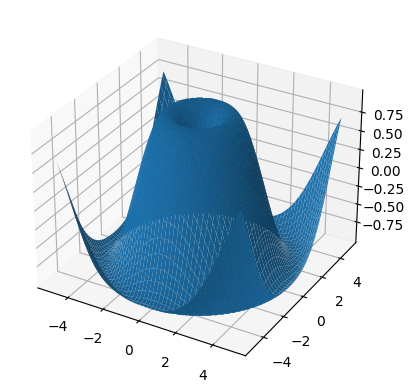

In [84]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

plt.show()